# <center>Decision Tree<center>

<p>Team Name:  B.C.
<p>Student Names: Brittney Jarreau, Caleb Charpentier, Leanne Nicholas
<p>Student W#s: 0455857, 0650629, 0670945

## Imports

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from collections import Counter
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import sklearn.model_selection as model_selection
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn import metrics
from seaborn import pairplot

# PART I

## Prepare Data

,Tx Amplitude at -6,Tx Amplitude at -5,Tx Amplitude at -4,Tx Amplitude at -2.5,Tx Amplitude at -2,Tx Amplitude at -1.5,Tx Amplitude at -1,Tx Amplitude at -0.5,Tx Amplitude at 2,Tx Amplitude at 3,...,Tx Phase at -2.5,Tx Phase at -2,Tx Phase at -1.5,Tx Phase at -1,Tx Phase at 0,Tx Phase at 1,Tx Phase at 2,Tx Phase at 3,Tx Phase at 4,Label
0,1,2,0,1,0,0,2,1,0,1,...,0,2,2,0,0,0,0,1,0,0
1,1,2,0,1,0,0,2,1,0,1,...,0,2,2,0,0,0,0,1,0,0
2,1,2,0,1,0,0,2,1,0,1,...,0,2,2,0,0,0,0,1,0,0
3,1,2,0,1,0,0,2,1,0,1,...,0,2,2,0,0,0,0,1,0,0
4,1,2,0,1,0,0,2,1,0,1,...,0,2,2,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1,2,1,1,1,2,1,0,0,0,...,2,2,0,1,0,0,1,0,0,1
176,1,2,1,1,1,2,1,0,0,0,...,2,2,0,1,0,0,1,0,0,1
177,1,2,1,1,1,2,1,0,0,0,...,2,2,0,1,0,0,1,0,0,1
178,1,2,1,1,1,2,1,0,0,0,...,2,2,0,1,0,0,1,0,0,1


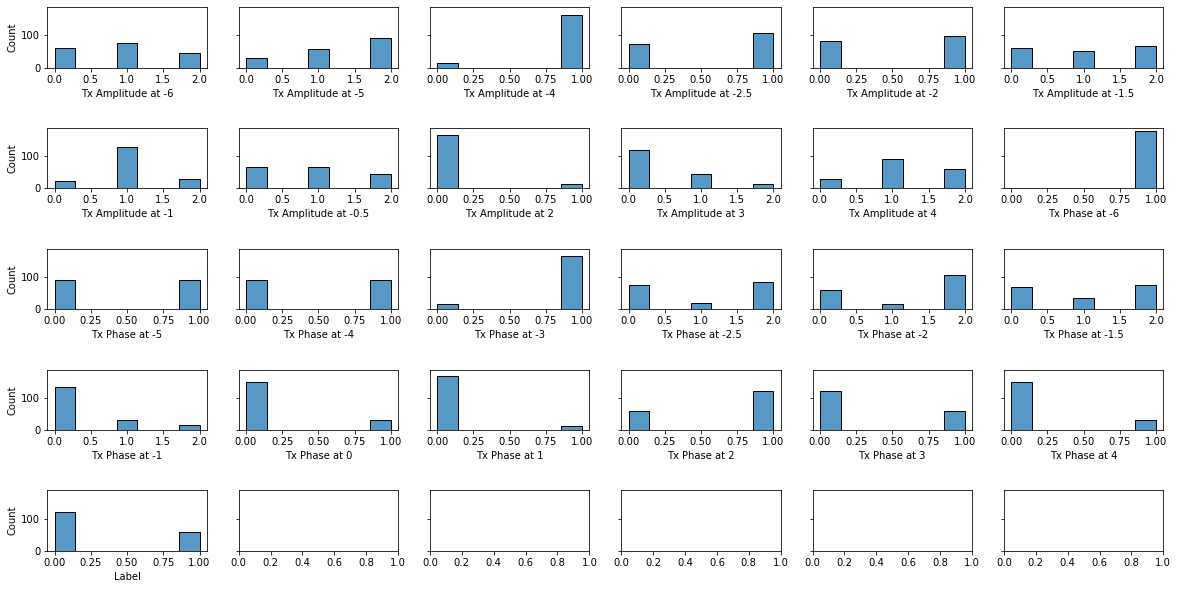

In [2]:
data = pd.read_csv("./Acoustic_Probing_DT.csv")
data = data.drop(["ID", "Trial"], axis=1)
data = data.drop(data.loc[:, data.nunique() == 1], axis=1)

#When the csv reads in, it detects an extra row of NaN
data = data.dropna()

#DecisionTreeClassifier works on numeric only, need to encode
le = preprocessing.LabelEncoder()
for attribute in data.columns:
    data[attribute] = le.fit_transform(data[attribute].values)

display(data)

fig, axes = plt.subplots(5, 6, figsize=(20, 10), sharey=True)

index = 0
for i in range(len(data.keys())):
    key = data.keys()[i]
    if data[key].dtype != 'object':
        sns.histplot(ax=axes[int(index/6)][index%6], x=key, data=data, bins=7)
        index += 1
plt.subplots_adjust(hspace=1)

Text(0.5, 1.0, 'Correlation between different features')

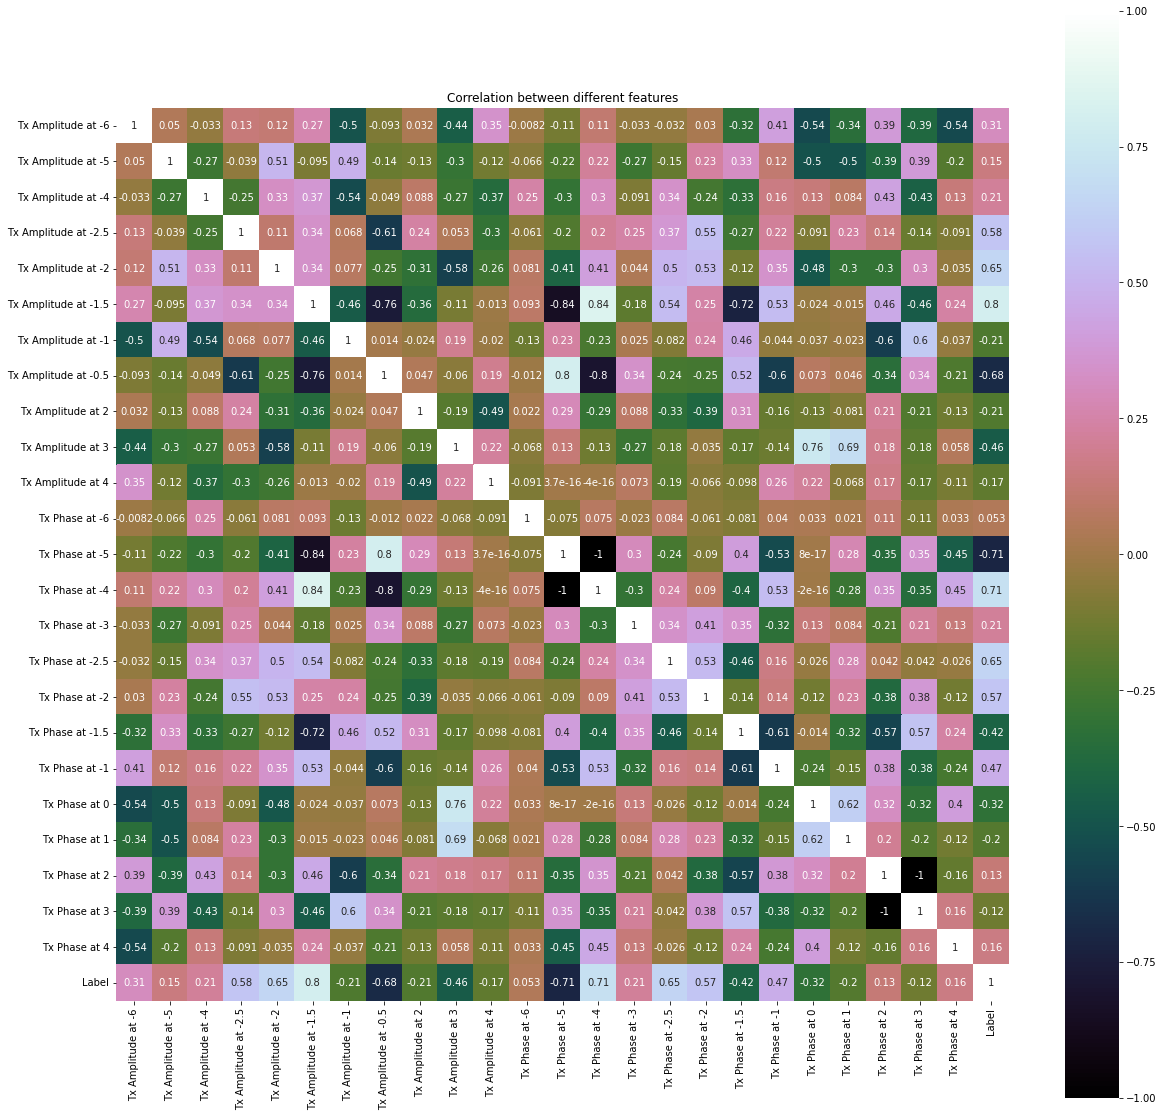

In [3]:
#correlation matrix using heatmap.
corelationBetweenCols = data.corr();
plt.figure(figsize=(20,20))
sns.heatmap(corelationBetweenCols, vmax=1, square=True, annot=True, cmap='cubehelix')
plt.title('Correlation between different features')

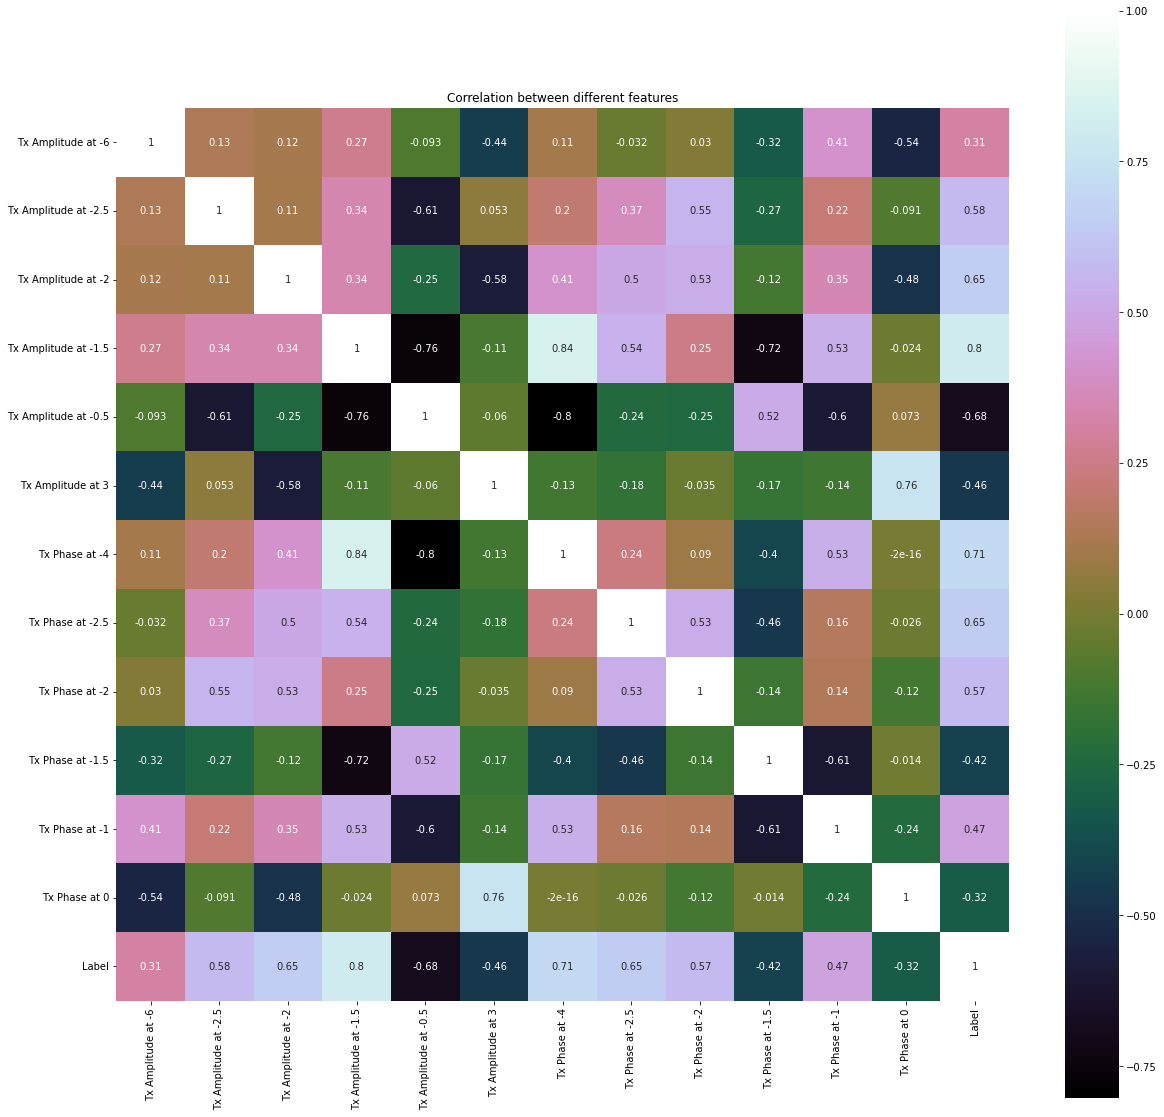

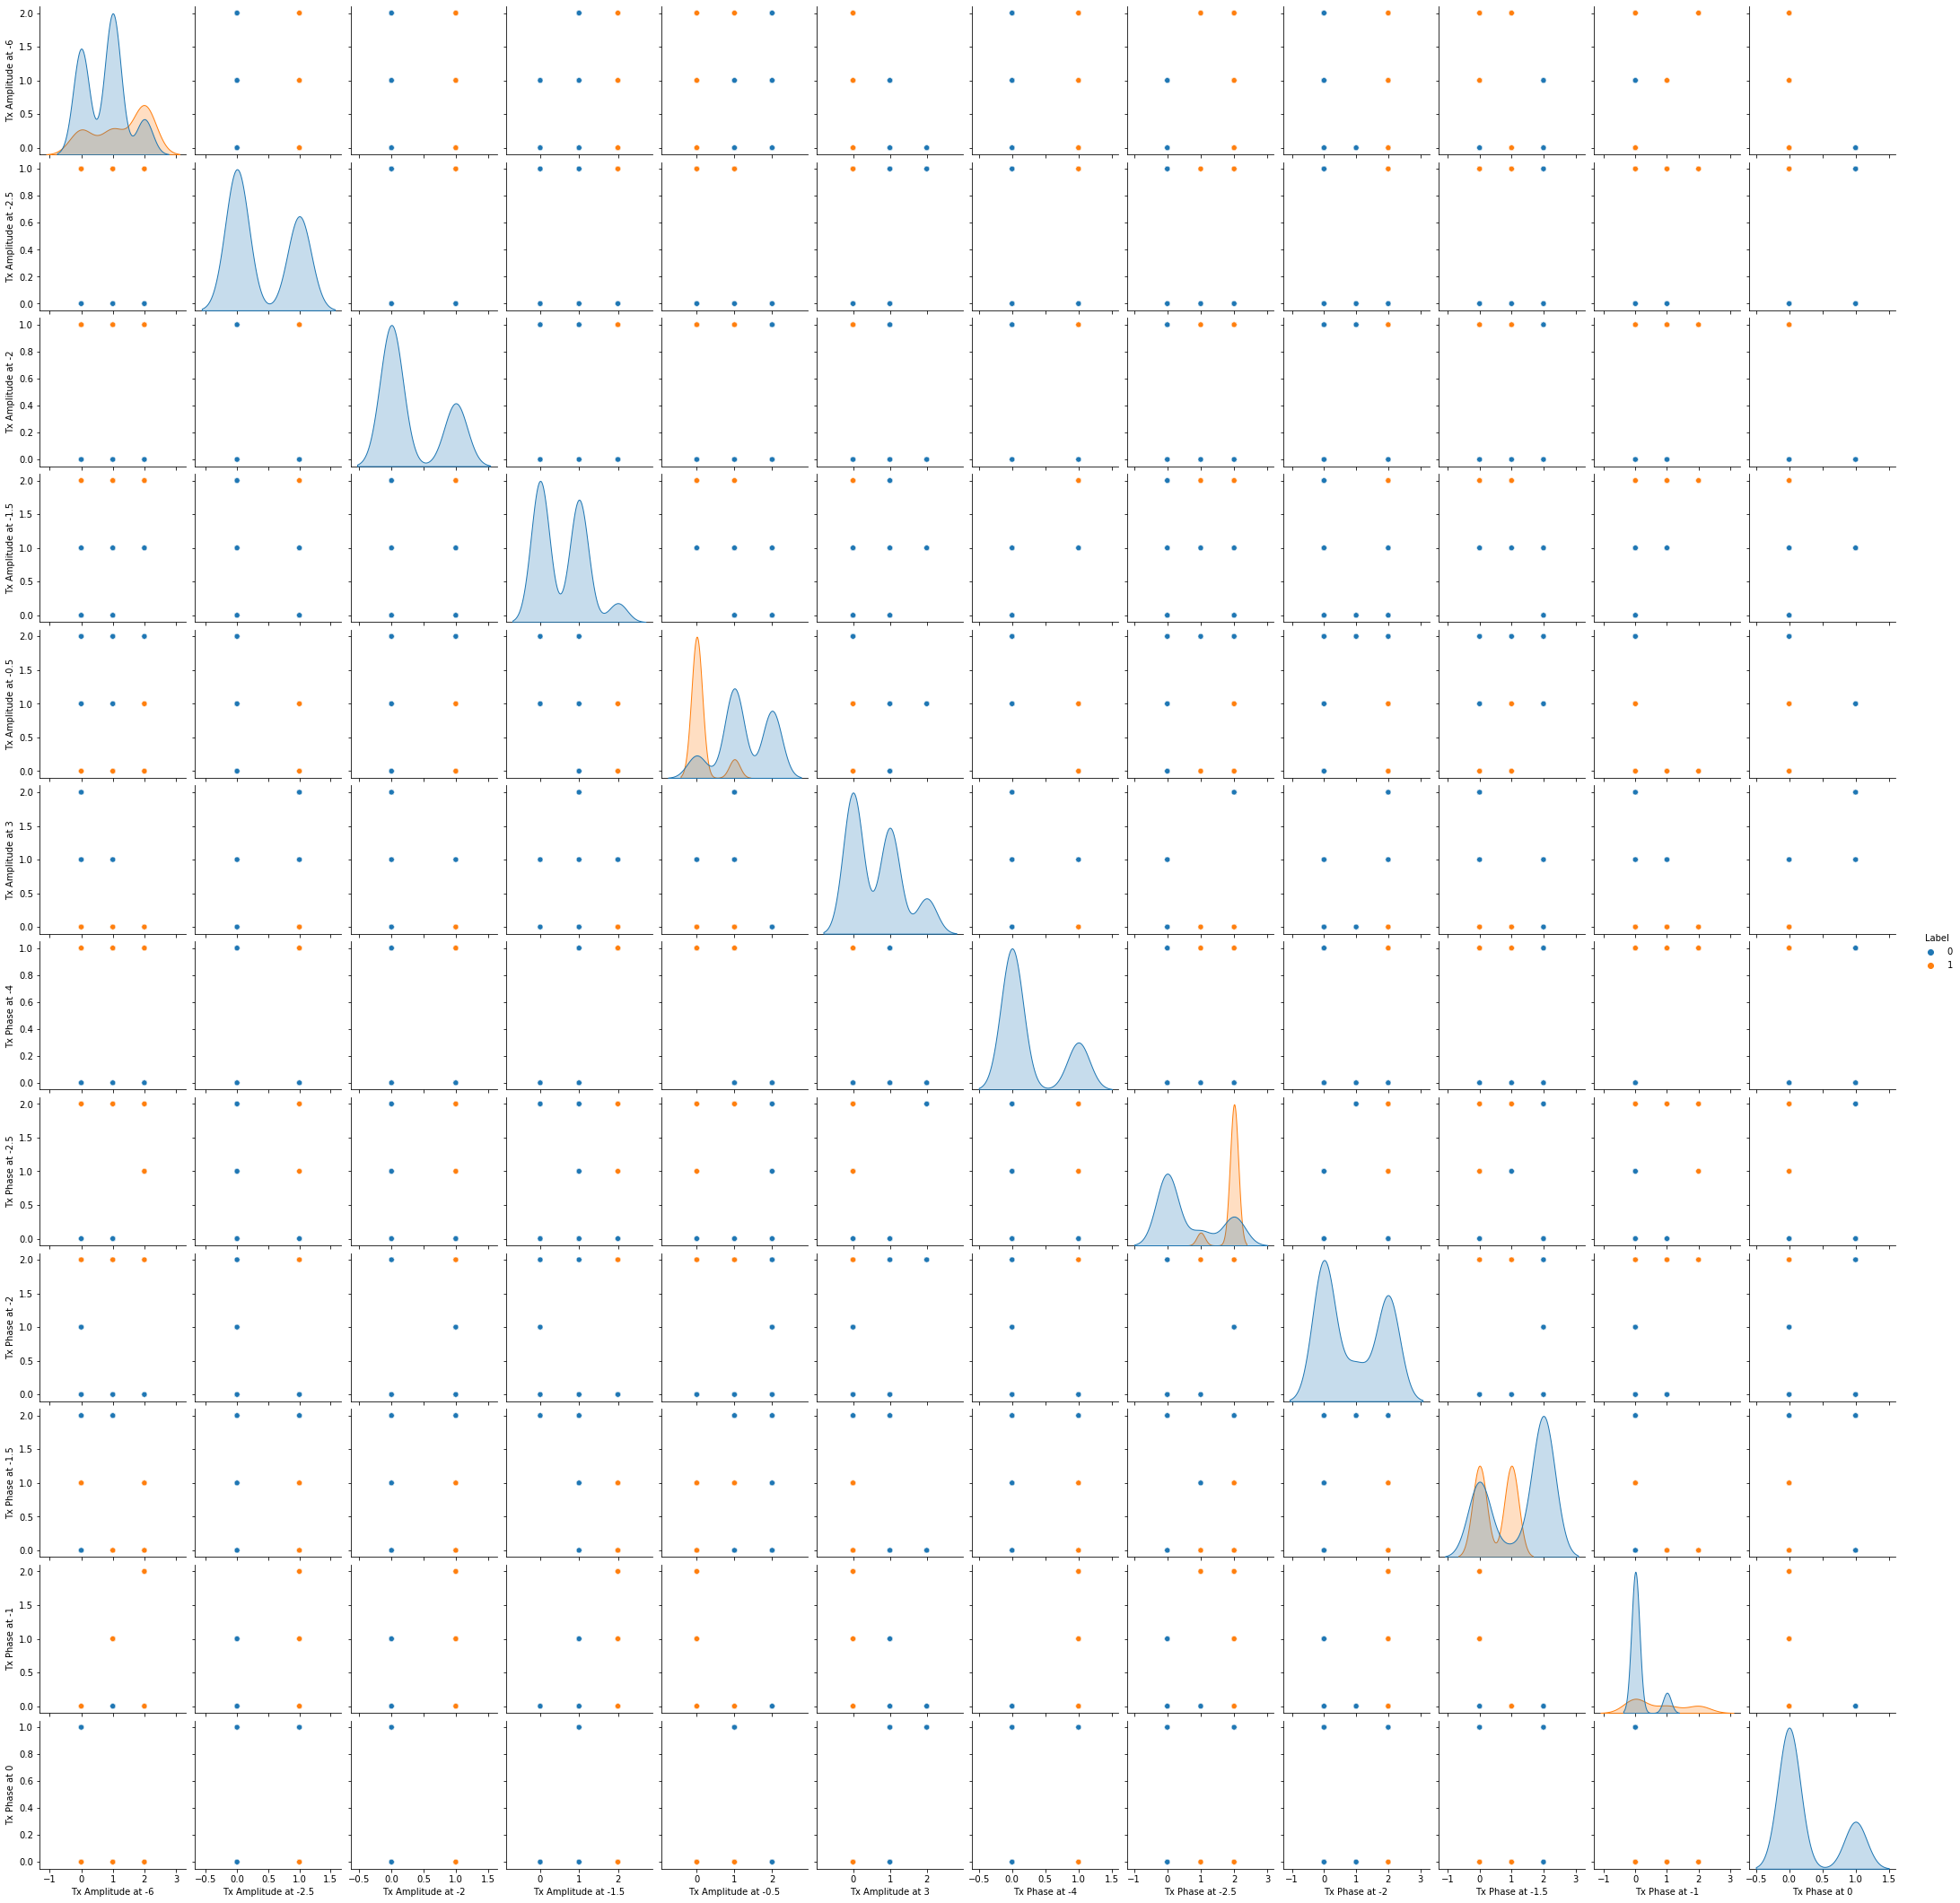

In [3]:
data = data.drop(["Tx Phase at -5", "Tx Phase at 2"], axis=1) # reduce highly correlated fields
data = data.drop(["Tx Amplitude at -5", "Tx Amplitude at -4", "Tx Amplitude at -1", "Tx Amplitude at 2", "Tx Amplitude at 4", "Tx Phase at -6", "Tx Phase at -3", "Tx Phase at 1", "Tx Phase at 3", "Tx Phase at 4"], axis=1) # drop fields that are not correlated to the label, they won't help

corelationBetweenCols = data.corr();
plt.figure(figsize=(20,20))
sns.heatmap(corelationBetweenCols, vmax=1, square=True, annot=True, cmap='cubehelix')
plt.title('Correlation between different features')

samples = data.drop(["Label"], axis=1)
labels = data.Label

pairplot(data, hue='Label')
plt.show()

X_train, X_test, y_train, y_test = model_selection.train_test_split(samples, labels, train_size=0.70,test_size=0.30, random_state=42)

<b>Generate a decision tree by means of a Python library</b>
- Use 70% of the data for training and 30% for testing.
- Compare performance of the model based on “gini” and “entropy” measures. As a performance measure use sensitivity, specificity, AUC, and F1-score
- Plot performance measures on a single figure for “gini” and “entropy”. Group by performance measures.

Entropy Measures: 


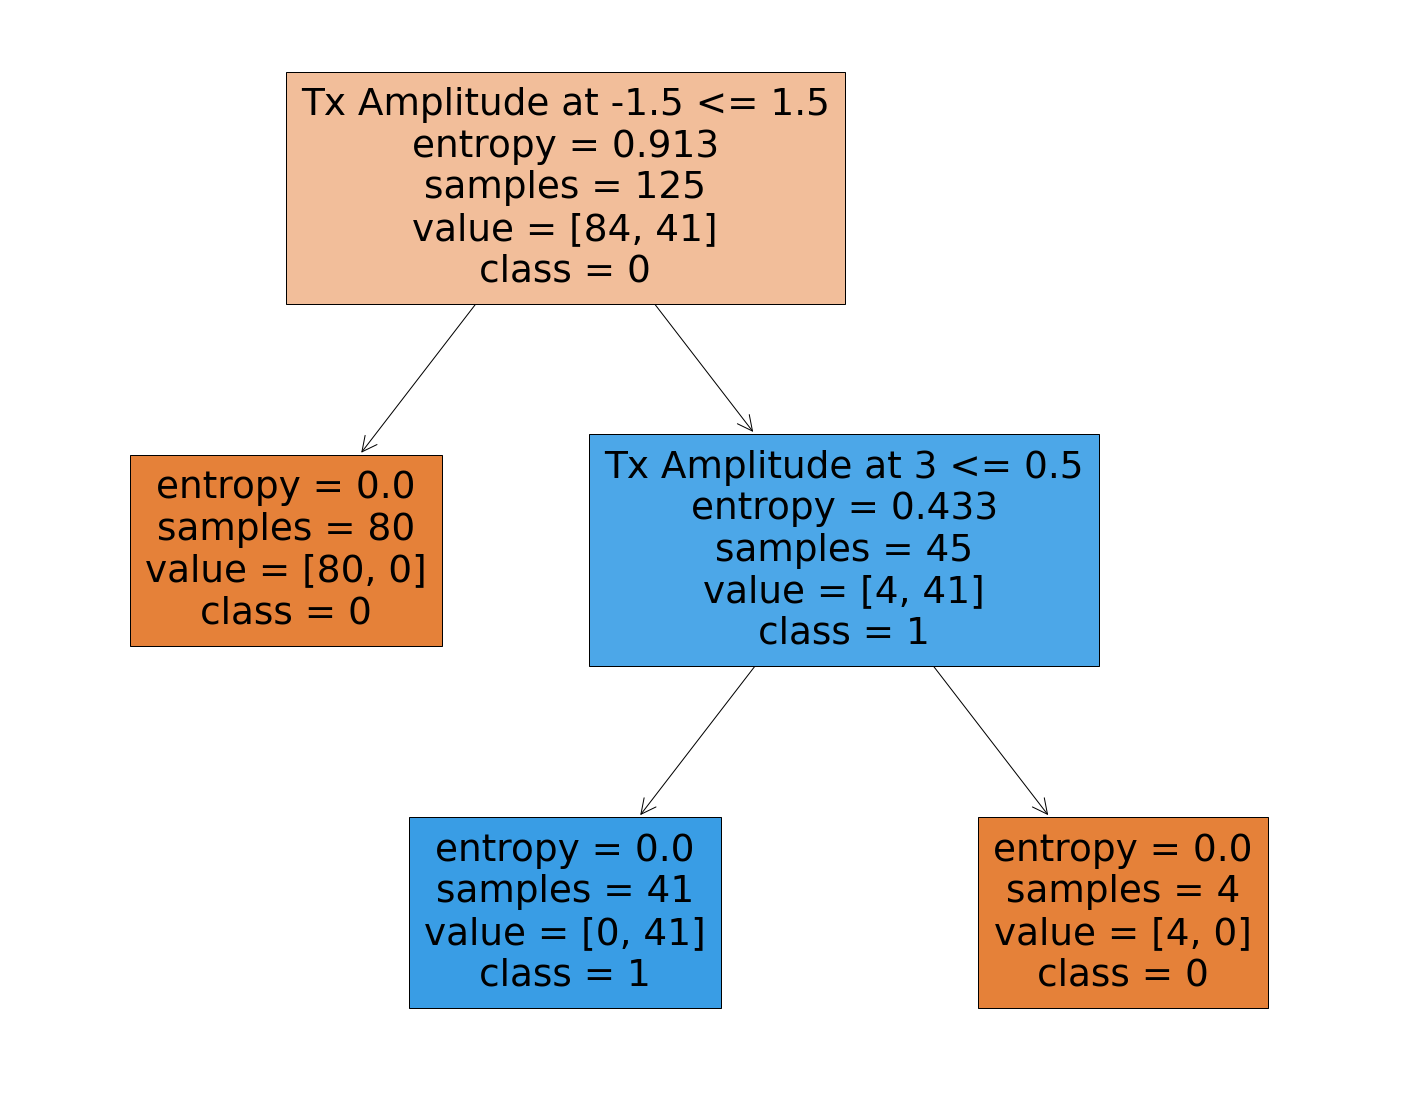

GINI Measures: 


In [4]:
def get_scores(acc, labels, prediction):
    f1 = metrics.f1_score(labels, prediction)
    conf_matrix = metrics.confusion_matrix(labels, prediction)
    sens = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
    spec = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])
    auc = metrics.roc_auc_score(labels, prediction)
    return sens, spec, f1, auc, acc

def add_plots(f1, sens, spec, auc, title):
  plt.bar(1, sens, label="{} Sensitivity".format(title))
  plt.bar(2, spec, label="{} Specificity".format(title))
  plt.bar(3, auc, label="{} AUC".format(title))
  plt.bar(4, f1, label="{} F1".format(title))

X_train, X_test, y_train, y_test = model_selection.train_test_split(samples, labels, train_size=0.70,test_size=0.30, random_state=42)

print("Entropy Measures: ") 
tree = DecisionTreeClassifier(criterion = 'entropy').fit(X_train, y_train)  
prediction = tree.predict(X_test)   
acc = tree.score(X_test, y_test)
sens, spec, f1, AUC, acc = get_scores(acc, y_test, prediction)
e_values = [sens, spec, f1, AUC, acc]

fig = plt.figure(figsize=(25,20))
_ = plot_tree(tree, max_depth=5, feature_names=samples.columns[:-1], class_names=['0','1'], filled=True)
plt.show()

print("GINI Measures: ")
tree = DecisionTreeClassifier(criterion = 'gini').fit(X_train, y_train)  
prediction = tree.predict(X_test)  
acc = tree.score(X_test, y_test)
sens, spec, f1, AUC, acc = get_scores(acc, y_test, prediction)
g_values = [sens, spec, f1, AUC, acc]

In [6]:
import pickle
pickle.dump(tree, open('DT', 'wb'))

Entropy Measures: 


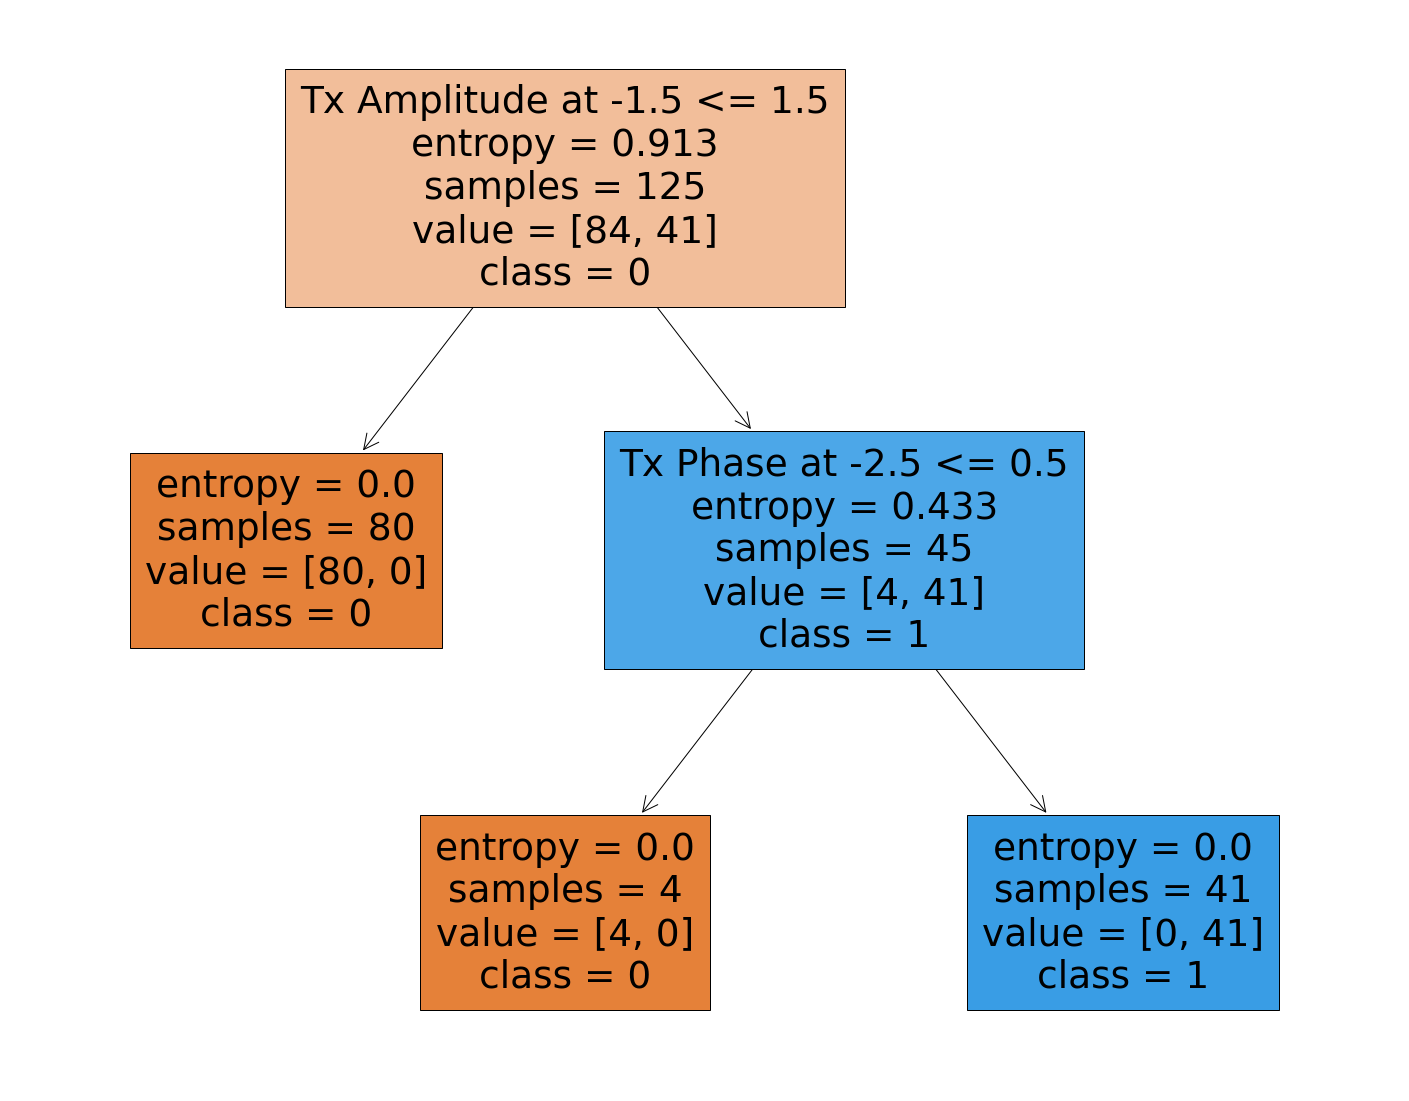

GINI Measures: 


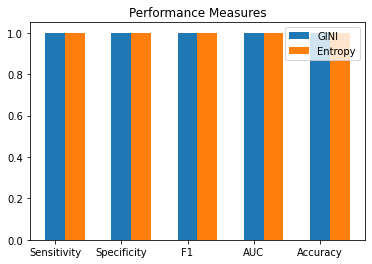

In [5]:
labels = ["Sensitivity", "Specificity", "F1", "AUC", "Accuracy"]
plt.title("Performance Measures")
width =0.3
plt.xticks(range(len(labels)), labels)
plt.bar(np.arange(len(g_values)), g_values, width=width, label="GINI")
plt.bar(np.arange(len(e_values)) + width, e_values, width=width, label="Entropy")
plt.legend()
plt.show()

## <center> REFERENCES </center>
List resources (book, internet page, etc.) that you used to complete this challenge.

https://pythonbasics.org/matplotlib-bar-chart/
https://www.statology.org/auc-in-python/
https://gist.github.com/jaradc/eeddf20932c0347928d0da5a09298147#:~:text=Four%20different%20ways%20to%20calculate%20entropy%20in%20Python,%28%20labels%2C%20return_counts%3DTrue%29%20return%20entropy%20%28%20counts%2C%20base%3Dbase%29